# Marketing

Problem statement:
A restaurant consolidator is looking to revamp the B2C portal using intelligent automation tech. This requires a different matrix to identify the star restaurants and generate recommendations. To make sure an effective model can be achieved, it is important to understand the behavior of the data in hand.
There are 2 datasets, data and Country-Code. Dataset data has 19 attributes and Country-Code has two attributes.
You are required to determine certain matrices to identify the star restaurants and generate recommendations.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing, Understanding, and Inspecting Data:

1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [49]:
df = pd.read_excel("D:/Home/Fortray/Data Analyst Masters Capstone/Project/Marketing/1683266696_dataset/Dataset/Sample.xlsx")

In [50]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         4571 non-null   object 
 1   Restaurant Name       4570 non-null   object 
 2   Country Code          4571 non-null   int64  
 3   City                  4571 non-null   object 
 4   Address               4571 non-null   object 
 5   Locality              4571 non-null   object 
 6   Locality Verbose      4571 non-null   object 
 7   Longitude             4571 non-null   float64
 8   Latitude              4571 non-null   float64
 9   Cuisines              4571 non-null   object 
 10  Average Cost for two  4571 non-null   int64  
 11  Currency              4571 non-null   object 
 12  Has Table booking     4571 non-null   object 
 13  Has Online delivery   4571 non-null   object 
 14  Price range           4571 non-null   int64  
 15  Aggregate rating     

In [52]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
# Clean the variable names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [55]:
df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,average_cost_for_two,currency,has_table_booking,has_online_delivery,price_range,aggregate_rating,rating_color,rating_text,votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


2. Based on the findings from the previous questions, identify duplicates and remove them

In [56]:
# Handle missing values
df_cleaned = df.dropna(subset=['restaurant_name'])

In [60]:
# Before cleaning
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()
structure = df_cleaned.info()

# Summary after cleaning
summary_after_cleaning = {
    'missing_values_after_cleaning': df_cleaned.isnull().sum(),
    'duplicates_after_cleaning': df_cleaned.duplicated().sum(),
    'unique_has_table_booking': df_cleaned['has_table_booking'].unique(),
    'unique_has_online_delivery': df_cleaned['has_online_delivery'].unique()
}

print(structure)
print("Missing values before cleaning:", missing_values)
print("Duplicates before cleaning:", duplicates)
print("Variable names after cleaning:", df.columns)
print("Summary after cleaning:", summary_after_cleaning)

<class 'pandas.core.frame.DataFrame'>
Index: 4570 entries, 0 to 4570
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         4570 non-null   object 
 1   restaurant_name       4570 non-null   object 
 2   country_code          4570 non-null   int64  
 3   city                  4570 non-null   object 
 4   address               4570 non-null   object 
 5   locality              4570 non-null   object 
 6   locality_verbose      4570 non-null   object 
 7   longitude             4570 non-null   float64
 8   latitude              4570 non-null   float64
 9   cuisines              4570 non-null   object 
 10  average_cost_for_two  4570 non-null   int64  
 11  currency              4570 non-null   object 
 12  has_table_booking     4570 non-null   object 
 13  has_online_delivery   4570 non-null   object 
 14  price_range           4570 non-null   int64  
 15  aggregate_rating      4570

# Performing EDA:

3. Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

In [64]:
# Explore the geographical distribution of the restaurants
city_count = df_cleaned['city'].value_counts()

In [65]:
city_count

city
New Delhi    2560
Gurgaon       698
Noida         515
Faridabad     108
Goa            20
             ... 
Mohali          1
Panchkula       1
Sandton         1
Singapore       1
Abu Dhabi       1
Name: count, Length: 66, dtype: int64

In [71]:
# Find cities with maximum and minimum number of restaurants

max_resturant_city = city_count.idxmax()
min_resturant_count = city_count.min()
min_resturant_city = city_count.idxmin()
max_resturant_count = city_count.max()

print(f"City with maximum number of Resturants: {max_resturant_city} have {max_resturant_count} Resturants")
print(f"City with minimum number of Resturants: {min_resturant_city} have {min_resturant_count} Resturants")      

City with maximum number of Resturants: New Delhi have 2560 Resturants
City with minimum number of Resturants: Tagaytay City have 1 Resturants


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


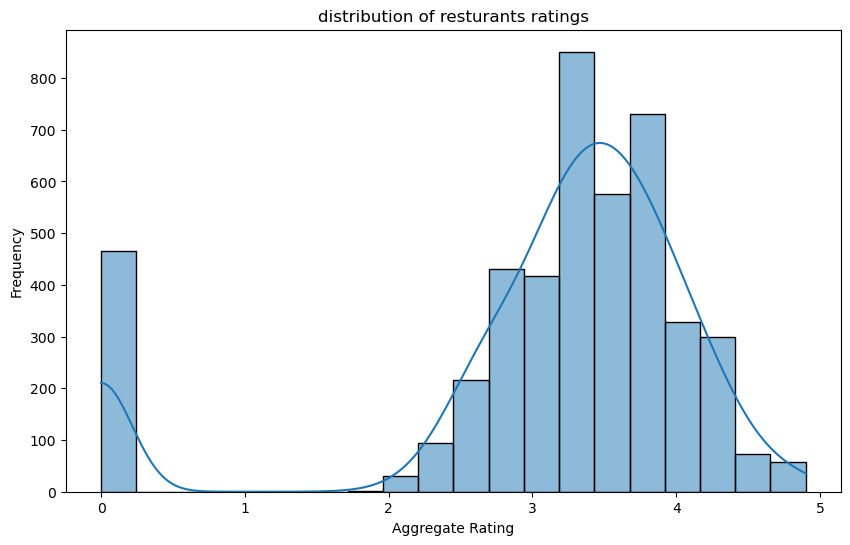

In [82]:
# Explore the distribution of ratings

plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['aggregate_rating'], bins=20, kde=True)
plt.title('distribution of resturants ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

4. Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

In [87]:
#franchise with most national presence

franchise_presence = df_cleaned.groupby('restaurant_name')['city'].nunique().sort_values(ascending = False)

top_franchise = franchise_presence.idxmax()
top_franchise_city = franchise_presence.max()

print(f"Most national presence is {top_franchise} in {top_franchise_city} cities")



Most national presence is Barbeque Nation in 21 cities


5. What is the ratio between restaurants that allow table booking vs those that do not allow table booking

In [97]:
# Calculate the ratio of restaurants that allow table booking vs those that do not

table_booking_count = df_cleaned['has_table_booking'].value_counts()

if 'yes' in table_booking_count and 'no' in table_booking_count:
    ratio = table_booking_count['yes']/table_booking_count['no']
else:
    ratio = 'none'
    
print(f"Table booking count: {table_booking_count}")    


Table booking count: has_table_booking
No     3440
Yes    1130
Name: count, dtype: int64


In [102]:
#ratio of restaurants that allow table booking vs those that do not
ratio = 1130/(1130+3440)*100
print(f"The ratio of restaurants that allow table booking vs those that do not is {ratio:.2f}%")

The ratio of restaurants that allow table booking vs those that do not is 24.73%


6. What is the percentage of restaurants providing online delivery

In [104]:
# Calculate the percentage of restaurants providing online delivery

online_delivery = df_cleaned['has_online_delivery'].value_counts()

if 'yes' in online_delivery and 'no' in online_delivery:
    ratio = online_delivery['yes']/online_delivery['no']
else: 'none'
    
print(f"Online Delivery Count: {online_delivery}")    

Online Delivery Count: has_online_delivery
No     2808
Yes    1762
Name: count, dtype: int64


In [107]:
Ratio = 1762/(1762+2808)*100
print(f"the percentage of restaurants providing online delivery is {Ratio:.2f}%")

the percentage of restaurants providing online delivery is 38.56%


7. What is the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [111]:
online_delivery = df[df['has_online_delivery'] == 'Yes']['votes']
no_online_delivery = df[df['has_online_delivery'] == 'No']['votes']

average_votes_online_delivery = online_delivery.mean()
average_votes_no_online_delivery = no_online_delivery.mean()

print(f"Average number of votes for the restaurants that deliver: {average_votes_online_delivery:.2f}")
print(f"Average number of votes for the restaurants that do not deliver: {average_votes_no_online_delivery:.2f}")

Average number of votes for the restaurants that deliver: 257.20
Average number of votes for the restaurants that do not deliver: 217.99


In [114]:
#difference in number of votes
difference = average_votes_online_delivery - average_votes_no_online_delivery
print(f"the difference in number of votes for the restaurants that deliver & that do not deliver is {difference:.2f}")

the difference in number of votes for the restaurants that deliver & that do not deliver is 39.21


8. What are the top 10 cuisines served across cities?

In [118]:
# Split the 'Cuisines' column into multiple cuisines
cuisines = df['cuisines'].str.split(",").explode().str.strip()

# Count the occurrences of each cuisine
cuisines = cuisines.value_counts()

# Get the top 10 cuisines
top_10_cuisines = cuisines.head(10)

print(f"Top 10 Cuisines are: ")
print(top_10_cuisines)


Top 10 Cuisines are: 
cuisines
North Indian    2456
Chinese         1748
Fast Food        815
Mughlai          785
Continental      686
Italian          643
Cafe             506
South Indian     270
Pizza            261
Desserts         229
Name: count, dtype: int64


9. What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?

In [119]:
# Fill NaN values with an empty string and then calculate the number of cuisines served by each restaurant
df['No_of_cuisines'] = df['cuisines'].fillna('').str.split(',').apply(len)

# Group by 'restaurant_name' to find the maximum and minimum number of cuisines served by any restaurant
cuisines_by_restaurant = df.groupby('restaurant_name')['No_of_cuisines'].max()

max_cuisines = cuisines_by_restaurant.max()
min_cuisines = cuisines_by_restaurant.min()

print(f"The maximum number of cuisines served by a restaurant is: {max_cuisines}")
print(f"The minimum number of cuisines served by a restaurant is: {min_cuisines}")

The maximum number of cuisines served by a restaurant is: 8
The minimum number of cuisines served by a restaurant is: 1


In [120]:
# Find the restaurants that serve the maximum and minimum number of cuisines
restaurants_max_cuisines = cuisines_by_restaurant[cuisines_by_restaurant == max_cuisines].index.tolist()
restaurants_min_cuisines = cuisines_by_restaurant[cuisines_by_restaurant == min_cuisines].index.tolist()

print(f"Restaurants serving the maximum number of cuisines ({max_cuisines}): {restaurants_max_cuisines}")
print(f"Restaurants serving the minimum number of cuisines ({min_cuisines}): {restaurants_min_cuisines}")

Restaurants serving the maximum number of cuisines (8): ['Bikanervala', 'Indian Summer Cafe', 'Marble', 'Mumbai Vibe', "R' ADDA", 'The Belgian Triple']
Restaurants serving the minimum number of cuisines (1): ['#45', '#Dilliwaala6', '#hashtag', '13 Cafe', '24/7 Bar- The Lalit New Delhi', '28 Capri Italy', '3 Wise Monkeys', '4th Street Cafe', '56 Fresca', '56 Ristorante Italiano', '6 Ballygunge Place', '60 ML - Country Inn & Suites by Carlson', 'A One Rasoi', 'A W Foods', 'A1 Restaurant', 'ADM Foodi', 'AK Your Food', 'ATM Bistro', 'Aapka Mangal Restaurant', 'Aarush - A Mediterranean Kitchen', 'Abar Khabo', 'Aces - The Card Room', 'Afghan Indian', 'Ahad Sons Restaurant', 'Ahata', 'Al Arabian Express', 'Al- Laziz', 'Alaturka', 'Alcoholic Lounge & Bar', 'Aloo Bhaji Restaurant', 'Amalfi', 'Anand Restaurant', 'Anandini - The Tea Room', 'Ano Tai - Jaypee Vasant Continental', 'Antares', 'Anwar Food Corner', 'Apache', 'Apna Punjabi Zayka', 'Apni Rasoi', 'Arabian Nites', 'Arabicaa 9', 'Armory - H

10. What is the distribution cost across the restaurants?

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


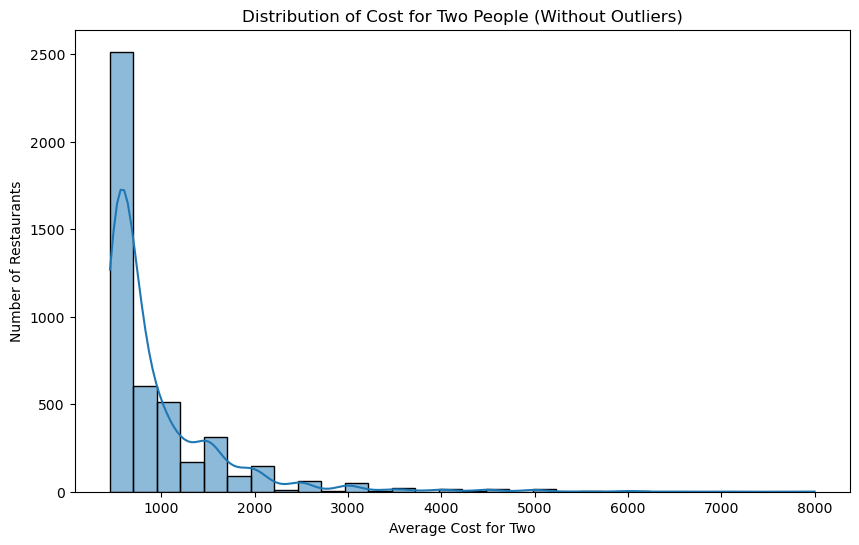

count      4571.000000
mean       2239.464012
std       23259.591559
min         450.000000
25%         550.000000
50%         700.000000
75%        1100.000000
max      800000.000000
Name: average_cost_for_two, dtype: float64


In [127]:
# Plotting the distribution
#plt.figure(figsize=(10,6))
#sns.histplot(df['average_cost_for_two'], bins=30, kde=True)
#plt.title('Distribution of Cost for Two People')
#plt.xlabel('Average Cost for Two')
#plt.ylabel('Number of Restaurants')
#plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df[df['average_cost_for_two'] < 20000]['average_cost_for_two'], bins=30, kde=True)
plt.title('Distribution of Cost for Two People (Without Outliers)')
plt.xlabel('Average Cost for Two')
plt.ylabel('Number of Restaurants')
plt.show()

# Summary statistics
print(df['average_cost_for_two'].describe())

11. How ratings are distributed among the various factors?

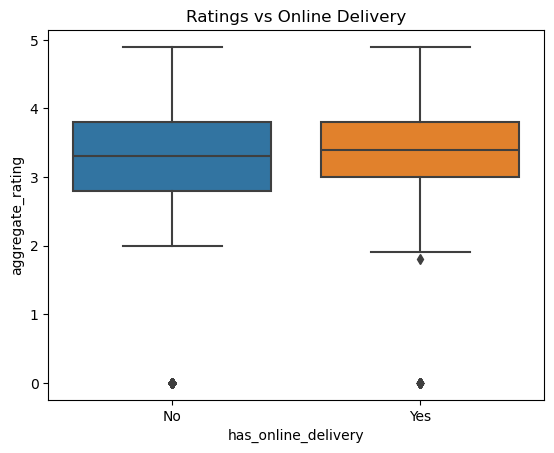

In [128]:
#Ratings vs Online Delivery

sns.boxplot(x='has_online_delivery', y='aggregate_rating', data=df)
plt.title('Ratings vs Online Delivery')
plt.show()

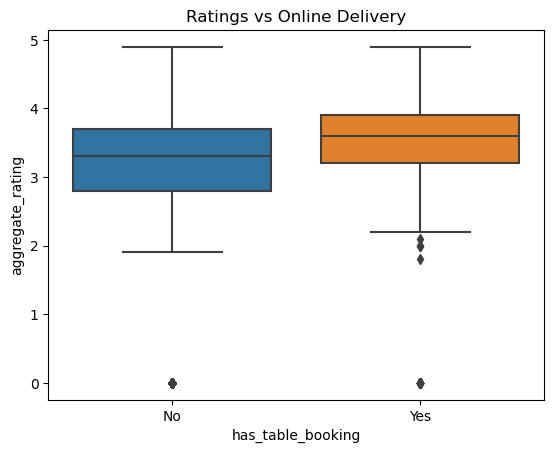

In [129]:
#Ratings vs Table Booking

sns.boxplot(x='has_table_booking', y='aggregate_rating', data=df)
plt.title('Ratings vs Online Delivery')
plt.show()

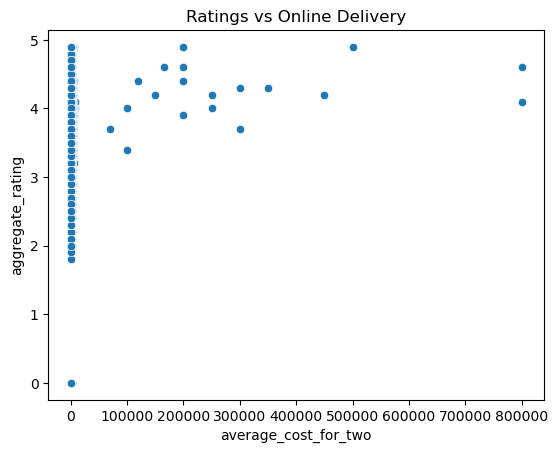

In [131]:
#Ratings vs Cost (average cost for two)

sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', data=df)
plt.title('Ratings vs Online Delivery')
plt.show()

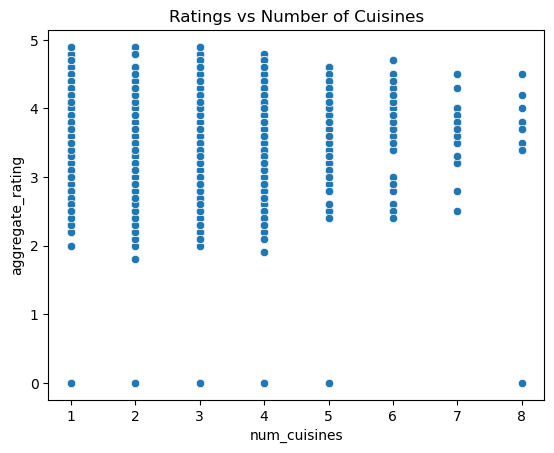

In [134]:
#Ratings vs Number of Cuisines (creating a number of cuisines column first)

df['num_cuisines'] = df['cuisines'].str.split(',').apply(len)
sns.scatterplot(x='num_cuisines', y='aggregate_rating', data=df)
plt.title('Ratings vs Number of Cuisines')
plt.show()

12. Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.

In [ ]:
Factors:               Why it affects ratings
Average cost for two:  Very cheap or very expensive places might have different expectations.
Has table booking:     Higher-end restaurants offering bookings might have better service and thus higher ratings.
Has online delivery:   Quick service and delivery can affect user satisfaction and ratings.
Number of cuisines:    More cuisines = more choices = can attract more people but can also lower specialization.
Restaurant Type:       Fine dining vs Cafes vs Quick Bites – expectations are different.
Location/Country Code: Different cities/countries have different taste preferences and standards.
    
-Restaurants with table booking generally have higher ratings.
-Moderate-priced restaurants are rated better than extremely cheap or very expensive ones.
-Restaurants with more than 3-4 cuisines might be rated lower if they are trying to do too much.    

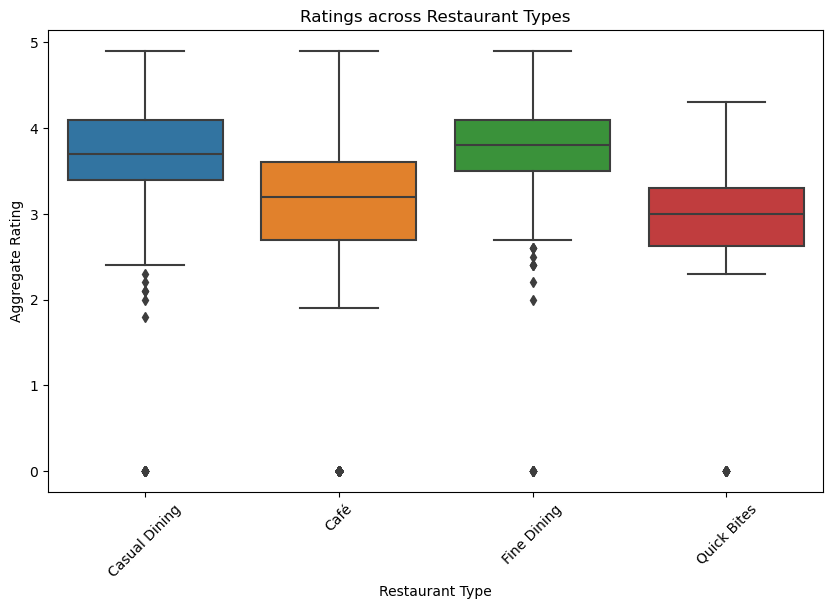

In [144]:
#creating new column restaurant_type

def assign_restaurant_type(row):
    if row['price_range'] == 4:
        return 'Fine Dining'
    elif row['price_range'] == 3:
        return 'Casual Dining'
    elif row['price_range'] == 2:
        return 'Café'
    else:
        return 'Quick Bites'

df['restaurant_type'] = df.apply(assign_restaurant_type, axis=1)


#Ratings vs Restaurant Type
plt.figure(figsize=(10,6))
sns.boxplot(x='restaurant_type', y='aggregate_rating', data=df)
plt.title('Ratings across Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.show()